In [1]:
from __future__ import division

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
def kernel(a, b, variance=1):
    """ Matern 5/2 Corvariance"""
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    sqdist /= variance
    return (1 + np.sqrt(5 * sqdist) + (5/3) * sqdist) * np.exp(-np.sqrt(5 * sqdist))
    

def gaussian_process(num_training, num_sample, function, kernel, 
       noise=0.00001, min_domain=-20, max_domain=20):
    ''' Performs a simple GP Regression using a provided function
        num_training: number of inital samples from provided function,
        num_sample: number of points to sample from posterior,
        function: provided function to estimate, either def() or lambda,
        kernel: function that computes and returns a full kernel matrix,
        noise: noise variance of training data,
        min_domain/max_domain: range of plotting/evaluating
    '''
    
    # Perform N inital evaulations of our function
    X = np.random.uniform(min_domain, max_domain, size=(num_training,1))
    y = function(X)
    K = kernel(X, X)
    L = np.linalg.cholesky(K + noise * np.eye(num_training))
    empirical_mean = np.mean(y)

    # points we're going to make predictions at.
    Xtest = np.linspace(min_domain, max_domain, num_sample).reshape(-1,1)

    # compute the mean at our test points.
    Lk = np.linalg.solve(L, kernel(X, Xtest))
    mu = np.dot(Lk.T, np.linalg.solve(L, y - empirical_mean)) + empirical_mean

    # compute the variance at our test points.
    K_ = kernel(Xtest, Xtest)
    s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
    s = np.sqrt(s2)
    
    # draw samples from the posterior at our test points.
    plt.figure(1, figsize=(10, 4))
    plt.plot(X, y, 'r+', ms=20)
    plt.gca().fill_between(Xtest[:,0], (mu-3*s)[:,0], (mu+3*s)[:,0], color="#dddddd")
    plt.plot(Xtest, mu, 'r--', lw=2)
    plt.plot(Xtest, function(Xtest), ":", color="blue", alpha=0.5)
    plt.scatter(X, y, s=20, color="black")
    plt.xlim(min_domain, max_domain)
    plt.title("Mean Prediction $\pm 3\sigma$")
    
    L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
    f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(num_sample,5)))
    
    plt.figure(2, figsize=(10,4))
    plt.plot(Xtest, f_post, color="black", alpha=0.9, lw=1)
    plt.plot(Xtest, function(Xtest), ":", color="blue", alpha=0.5)
    plt.xlim(min_domain, max_domain)
    plt.show()

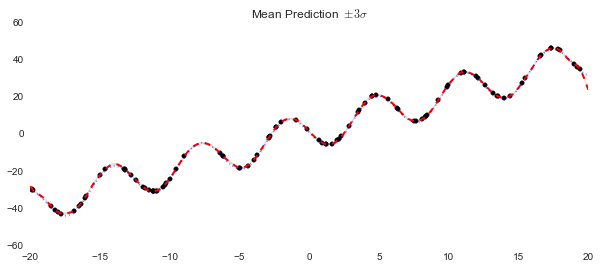

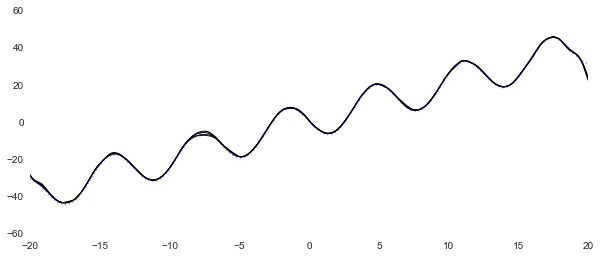

In [82]:
gaussian_process(100, 1000, lambda x: 2*x - 10 * np.sin(x) + 2 * np.random.random(), kernel, 0.01)